In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

import utils

In [2]:
mu = 10
sigma = 5

gaussian_population = np.random.normal(mu, sigma, 100_000)

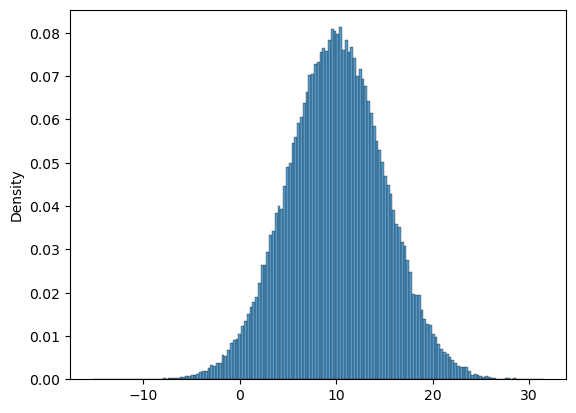

In [3]:
sns.histplot(gaussian_population, stat="density")
plt.show()

In [4]:
gaussian_pop_mean = np.mean(gaussian_population)
gaussian_pop_std = np.std(gaussian_population)

print(
    f"Gaussian population has mean: {gaussian_pop_mean:.1f} and std: {gaussian_pop_std:.1f}"
)

Gaussian population has mean: 10.0 and std: 5.0


In [5]:
def sample_means(data, sample_size):
    # Save all the means in a list
    means = []

    # For a big number of samples
    # This value does not impact the theorem but how nicely the histograms will look (more samples = better looking)
    for _ in range(10_000):
        # Get a sample of the data WITH replacement
        sample = np.random.choice(data, size=sample_size)

        # Save the mean of the sample
        means.append(np.mean(sample))

    # Return the means within a numpy array
    return np.array(means)

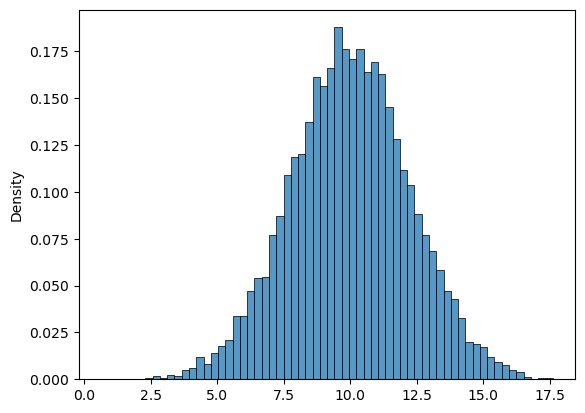

In [6]:
# Compute the sample means
gaussian_sample_means = sample_means(gaussian_population, sample_size=5)

# Plot a histogram of the sample means
sns.histplot(gaussian_sample_means, stat="density")
plt.show()

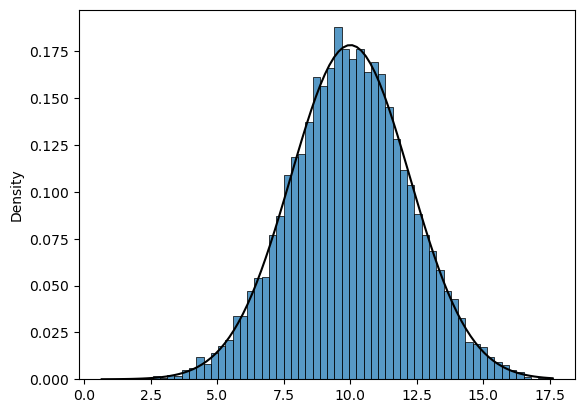

In [7]:
# Compute estimated mu
mu_sample_means = mu

# Compute estimated sigma
# 5 is being used because you used a sample size of 5
sigma_sample_means = sigma / np.sqrt(5)

# Define the x-range for the Gaussian curve (this is just for plotting purposes)
x_range = np.linspace(min(gaussian_sample_means), max(gaussian_sample_means), 100)

# Plot everything together
sns.histplot(gaussian_sample_means, stat="density")
plt.plot(
    x_range,
    norm.pdf(x_range, loc=mu_sample_means, scale=sigma_sample_means),
    color="black",
)
plt.show()

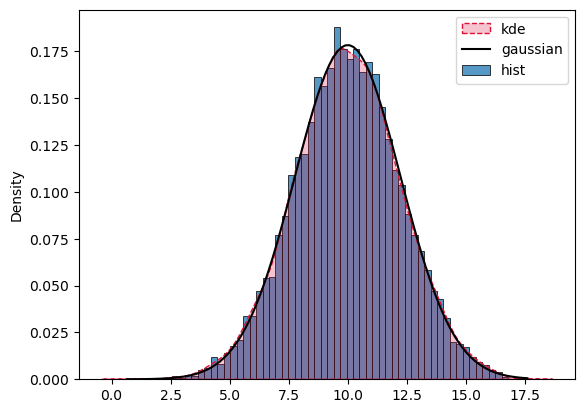

In [8]:
# Histogram of sample means (blue)
sns.histplot(gaussian_sample_means, stat="density", label="hist")

# Estimated PDF of sample means (red)
sns.kdeplot(
    data=gaussian_sample_means,
    color="crimson",
    label="kde",
    linestyle="dashed",
    fill=True,
)

# Gaussian curve with estimated mu and sigma (black)
plt.plot(
    x_range,
    norm.pdf(x_range, loc=mu_sample_means, scale=sigma_sample_means),
    color="black",
    label="gaussian",
)

plt.legend()
plt.show()

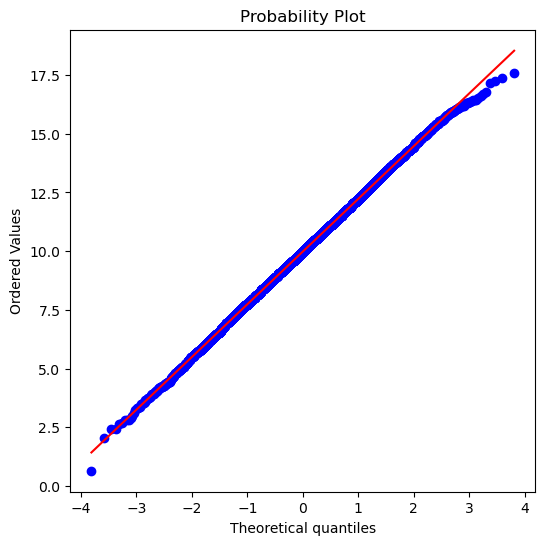

In [9]:
# Create the QQ plot
fig, ax = plt.subplots(figsize=(6, 6))
res = stats.probplot(gaussian_sample_means, plot=ax, fit=True)
plt.show()

In [10]:
utils.gaussian_clt()

interactive(children=(FloatSlider(value=10.0, continuous_update=False, description='mu', max=50.0, min=0.01, r…

In [11]:
n = 5
p = 0.8

binomial_population = np.random.binomial(n, p, 100_000)

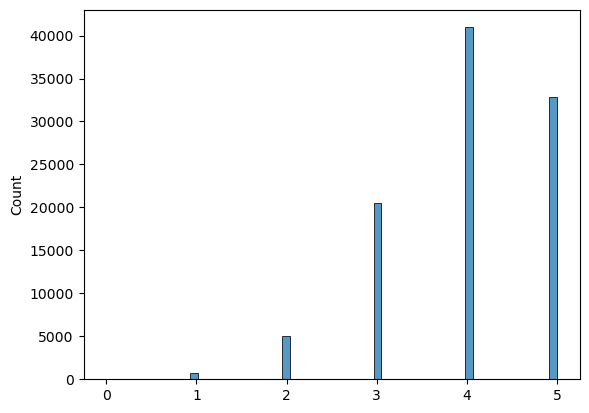

In [12]:
sns.histplot(binomial_population, stat="count")
plt.show()

In [13]:
binomial_pop_mean = np.mean(binomial_population)
binomial_pop_std = np.std(binomial_population)

print(
    f"Gaussian population has mean: {binomial_pop_mean:.1f} and std: {binomial_pop_std:.1f}"
)

Gaussian population has mean: 4.0 and std: 0.9


In [14]:
binomial_pop_mean = n * p
binomial_pop_std = np.sqrt(n * p * (1 - p))

print(
    f"Gaussian population has mean: {binomial_pop_mean:.1f} and std: {binomial_pop_std:.1f}"
)

Gaussian population has mean: 4.0 and std: 0.9


In [15]:
sample_size = 3
N = n * sample_size

condition_value = np.min([N * p, N * (1 - p)])
print(
    f"The condition value is: {int(condition_value*10)/10:.1f}. CLT should hold?: {True if condition_value >= 5 else False}"
)

The condition value is: 2.9. CLT should hold?: False


In [16]:
# Compute sample means
binomial_sample_means = sample_means(binomial_population, sample_size=sample_size)

# Compute estimated mu
mu_sample_means = n * p

# Compute estimated sigma
sigma_sample_means = np.sqrt(n * p * (1 - p)) / np.sqrt(sample_size)

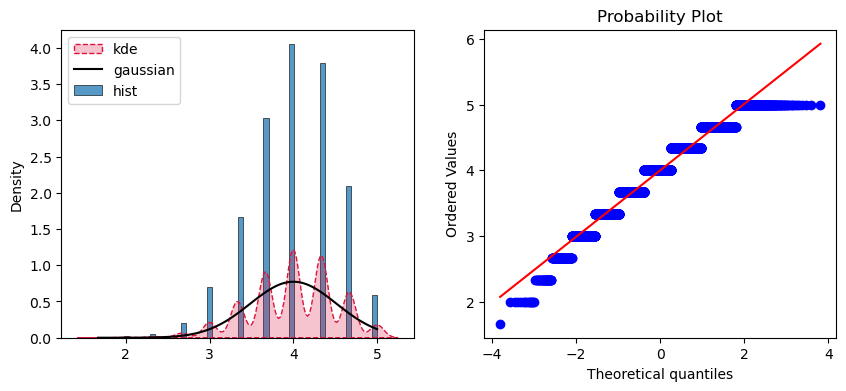

In [17]:
# Create the plots
utils.plot_kde_and_qq(binomial_sample_means, mu_sample_means, sigma_sample_means)

In [18]:
sample_size = 30
N = n * sample_size

condition_value = np.min([N * p, N * (1 - p)])
print(
    f"The condition value is: {int(condition_value*10)/10:.1f}. CLT should hold?: {True if condition_value >= 5 else False}"
)

The condition value is: 29.9. CLT should hold?: True


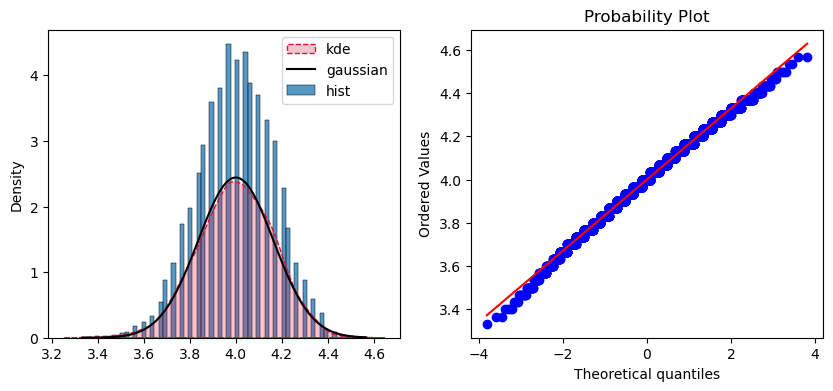

In [19]:
binomial_sample_means = sample_means(binomial_population, sample_size=sample_size)

# Compute estimated mu
mu_sample_means = n * p

# Compute estimated sigma
sigma_sample_means = np.sqrt(n * p * (1 - p)) / np.sqrt(sample_size)

# Create the plots
utils.plot_kde_and_qq(binomial_sample_means, mu_sample_means, sigma_sample_means)

In [20]:
utils.poisson_clt()

interactive(children=(FloatSlider(value=1.5, continuous_update=False, description='mu', max=5.0, min=0.01, rea…

In [21]:
cauchy_population = np.random.standard_cauchy(1000)

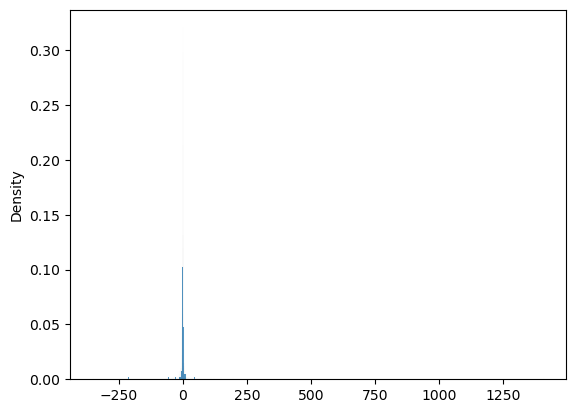

In [22]:
sns.histplot(cauchy_population, stat="density", label="hist")
plt.show()

In [23]:
cauchy_sample_means = sample_means(cauchy_population, sample_size=30)

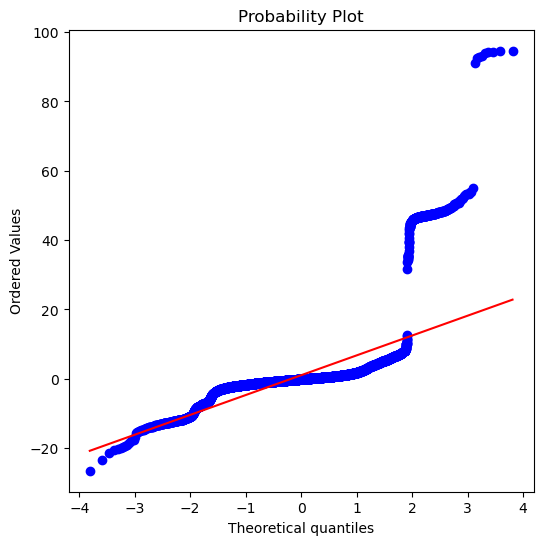

In [24]:
# Create the QQ plot
fig, ax = plt.subplots(figsize=(6, 6))
res = stats.probplot(cauchy_sample_means, plot=ax, fit=True)
plt.show()

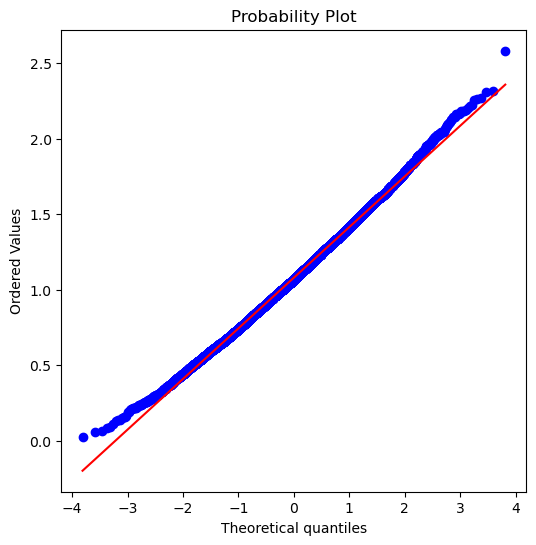

In [25]:
cauchy_sample_means = sample_means(cauchy_population, sample_size=20000)

# Create the QQ plot
fig, ax = plt.subplots(figsize=(6, 6))
res = stats.probplot(cauchy_sample_means, plot=ax, fit=True)
plt.show()